# Problem statement: https://judge.nitro-ai.org/roai-2025/simulare-ojia-2/problems/1/task

# Preparing data

In [1]:
import pandas as pd

train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

# Since 'Status' is the target of my prediction i will convert it into labels of 0 or 1.
train_df['Status'] = train_df['Status'].map({'Alive':1, 'Dead':0})

# I will separate my target attribute from the rest:
train_X = train_df.drop(columns='Status')
train_y = train_df['Status']

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3219 non-null   int64  
 1   Age                     3219 non-null   float64
 2   Race                    3219 non-null   object 
 3   Marital Status          3219 non-null   object 
 4   T Stage                 3219 non-null   object 
 5   N Stage                 3219 non-null   object 
 6   6th Stage               3116 non-null   object 
 7   differentiate           3219 non-null   object 
 8   Grade                   3219 non-null   object 
 9   A Stage                 3219 non-null   object 
 10  Tumor Size              2256 non-null   float64
 11  Estrogen Status         3219 non-null   object 
 12  Progesterone Status     3219 non-null   object 
 13  Regional Node Examined  3219 non-null   float64
 14  Reginol Node Positive   3219 non-null   

I have to manage the missing values from "Tumor Size" and "6th Stage" attributes. Also i notice some attributes that i want to drop

In [2]:
#brief examination of the entries containing NaN
print(train_df.loc[:10, ["Tumor Size","6th Stage"]])
train_df.iloc[:10, :16]

     Tumor Size 6th Stage
0           NaN       NaN
1   3998.797606       IIB
2     10.712932       IIA
3     15.964767       IIA
4     21.246372       IIB
5     21.784822       IIB
6   1002.075122       IIB
7     -0.083314      IIIA
8           NaN       IIB
9     64.225459      IIIA
10  4005.053343       IIB


,ID,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,1,62.300654,White,Widowed,T1,N1,NaN,Moderately differentiated,2,Regional,NaN,Positive,Positive,61.952140,-3.000350,1
1,2,37.268422,White,Married,T2,N1,IIB,Well differentiated,1,Regional,3998.797606,Positive,Positive,3.807271,2.312096,1
2,3,55.864953,White,Single,T1,N1,IIA,Well differentiated,1,Regional,10.712932,Positive,Positive,54.044711,6.499322,1
3,4,60.586799,White,Divorced,T1,N1,IIA,Poorly differentiated,3,Regional,15.964767,Positive,Positive,11.860835,11.537015,1
4,5,48.197741,White,Separated,T2,N1,IIB,Moderately differentiated,2,Regional,21.246372,Positive,Positive,4.571804,-6.975745,1
5,6,50.346899,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,21.784822,Positive,Positive,29.040042,-5.993005,1
6,7,23.784110,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,1002.075122,Positive,Negative,15.406487,1.342336,1
7,8,45.510135,Black,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,-0.083314,Positive,Positive,82.219199,9.100124,0
8,9,66.192324,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,NaN,Positive,Positive,19.371417,2.151866,1
9,10,60.701490,White,Widowed,T3,N1,IIIA,Poorly differentiated,3,Regional,64.225459,Positive,Negative,62.702391,5.417244,1


In [3]:
train_df.describe()

,ID,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Status,Reginol Node Negative,Blood Pressure,Diastolic Pressure,Cholesterol,...,BMI,Heart Rate,Serum Creatinine,Uric Acid,Hemoglobin,GFR,Serum Sodium,Serum Potassium,Serum Albumin,Lactate
count,3219.000000,3219.000000,2256.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,...,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,1610.000000,53.901473,720.038940,24.409893,4.255076,0.845915,10.047494,134.587488,88.919902,223.451326,...,29.114799,79.638509,0.917828,5.321600,15.163777,90.243284,140.053107,4.248460,4.272023,1.069535
std,929.389585,10.294228,1246.422989,22.708226,7.144451,0.361086,9.003695,26.430064,18.385016,43.856939,...,7.942761,12.760401,5.006427,5.100319,5.255430,17.720652,5.728874,5.039367,4.829481,5.016940
min,1.000000,19.751908,-7.064732,-10.604551,-13.080537,0.000000,-16.287874,76.517261,47.126692,139.373409,...,5.612847,47.926433,-15.806928,-12.841881,-2.859851,45.645460,121.729688,-13.244634,-16.834811,-14.882563
25%,805.500000,46.604853,19.015620,9.420290,-0.411446,1.000000,3.649412,112.283314,73.454975,186.525984,...,23.261407,69.429444,-2.454253,1.677006,11.688549,75.794487,136.254325,0.809133,1.016480,-2.442360
50%,1610.000000,54.251208,34.031375,16.733487,3.332956,1.000000,9.374251,134.298555,88.367863,223.005459,...,29.199006,79.280944,0.873854,5.269914,15.147940,90.674069,140.048988,4.223347,4.275040,1.144759
75%,2414.500000,61.676225,999.511983,29.037701,7.777126,1.000000,15.542617,156.782306,104.307555,260.305345,...,34.858202,89.917913,4.396527,8.791919,18.711793,104.821243,144.011247,7.668340,7.460993,4.453030
max,3219.000000,82.524127,4013.134127,96.122485,48.973461,1.000000,55.639502,190.171476,129.451922,307.504717,...,53.693036,112.606110,20.557006,22.019927,36.576925,128.976245,158.091875,24.960126,22.494888,20.029740


## Further investigations revealed that there are negative values (unusual since some are measurements). I will keep them this way and only impute the missing values with the median for numerical features and with 'missing' for categorical ones.

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tumor Size'}>,
        <Axes: title={'center': 'Regional Node Examined'}>,
        <Axes: title={'center': 'Reginol Node Positive'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Reginol Node Negative'}>,
        <Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Diastolic Pressure'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Body Temperature'}>,
        <Axes: title={'center': 'Oxygen Saturation'}>,
        <Axes: title={'center': 'Respiratory Rate'}>,
        <Axes: title={'center': 'Blood Glucose'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Serum Creatinine'}>,
        <Axes: title={'center': 'Uric Acid'}>,
        <Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'GFR'}>],
   

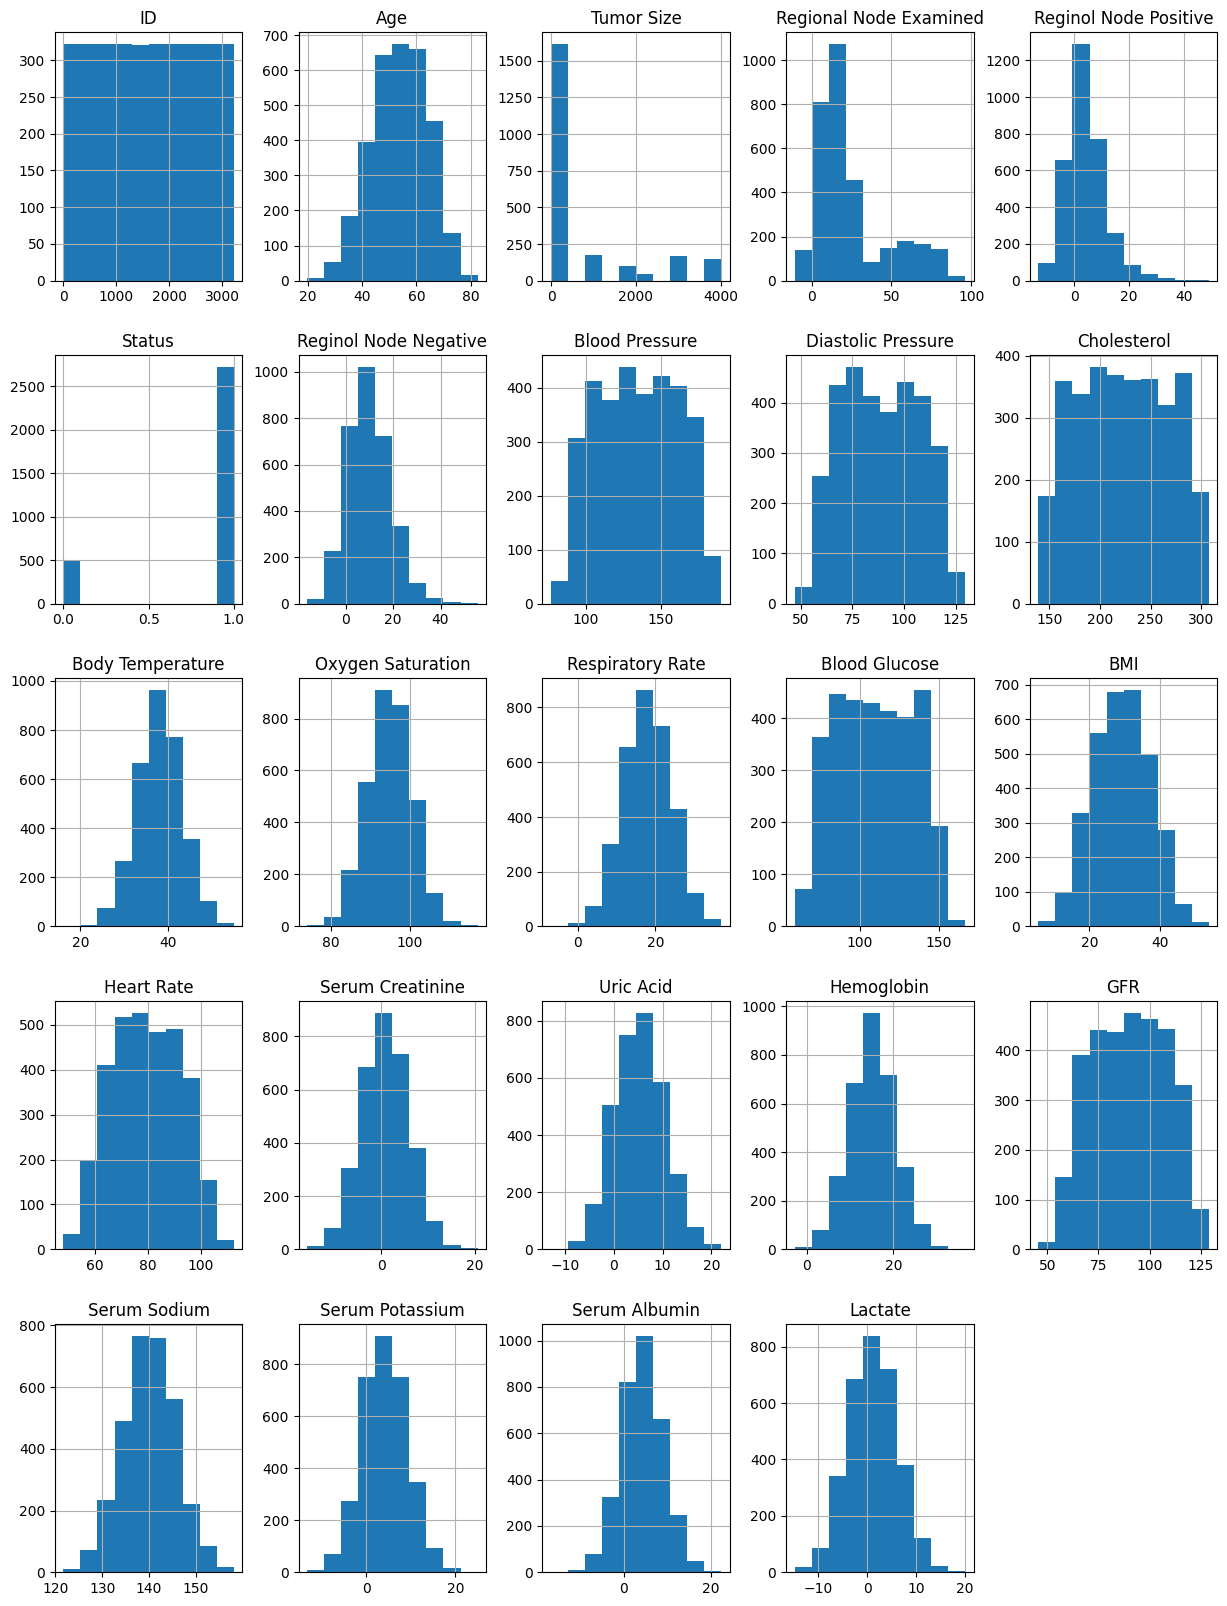

In [4]:
# Data appears to be well distributed 
train_df.hist(figsize=(15, 20)) 

# Data related tasks

## Subtask 1

In [5]:
GFR_cat = (test_df['GFR'] >= 90).map({True:'Normal', False:'Mildly Decreased'})

## Subtask 2

In [6]:
train_quartiles = train_df['Serum Creatinine'].quantile([0.25, 0.5, 0.75])
train_quartiles

s2_bins = [-1e10, train_quartiles[0.25], train_quartiles[0.5], train_quartiles[0.75], 1e10]
s2_labels = ['Very Low', 'Low', 'High', 'Very High']

risk_level = pd.cut(test_df['Serum Creatinine'], bins=s2_bins, labels=s2_labels)

## Subtask 3

In [7]:
train_median_BMI = train_df['BMI'].median()

BMI_status = (test_df['BMI'] > train_median_BMI).map({True:1, False:0})

## Subtask 4

In [8]:
T_vals = train_df['T Stage'].value_counts()
patient_similar_T  = test_df['T Stage'].map(T_vals)
patient_similar_T

0      1281
1      1281
2      1430
3       418
4      1281
       ... 
800    1281
801    1430
802    1430
803    1281
804    1281
Name: T Stage, Length: 805, dtype: int64

# Helper function for getting column labels

In [9]:
#This is my function with a dynamic approach of sorting on dtypes 
def identify_attributes_labels(df):
    """
    Identifies and returns various attributes of the given DataFrame.
    
    This function returns:
    - All numerical features in the DataFrame.
    - Numerical features that contain NaN values.
    - All categorical features in the DataFrame.
    - Categorical features that contain NaN values.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame from which features will be identified.

    Returns:
    -------
    tuple : 
        - numerical_columns (pandas.Index): All numerical feature columns.
        - numerical_nan_columns (pandas.Index): Numerical features with NaN values.
        - categorical_columns (pandas.Index): All categorical feature columns.
        - categorical_nan_columns (pandas.Index): Categorical features with NaN values.
    """
    numerical_features = df.select_dtypes(include=['float', 'int'])
    
    numerical_features_with_nan_labels = numerical_features.columns[numerical_features.isna().any()]
    
    cat_features = df.select_dtypes(exclude=['float', 'int'])
    
    cat_features_with_nan_labels = cat_features.columns[cat_features.isna().any()]

    return numerical_features.columns, numerical_features_with_nan_labels, cat_features.columns, cat_features_with_nan_labels

In [10]:
num_atr_cols, num_nan_cols, cat_atr_cols, cat_nan_cols = identify_attributes_labels(train_X)

# ML Architecture:

### Making my preprocessing pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def create_preprocessor(num_atr_cols, cat_atr_cols, scale=False):
    num_steps = [('imputer', SimpleImputer(strategy='median'))]
    
    if scale:
        num_steps.append(('scaler', StandardScaler()))
    
    num_pipeline = Pipeline(num_steps)
    
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value="Missing")),
        ('HotEncode', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_atr_cols),
        ('cat', cat_pipeline, cat_atr_cols)
    ])

    return preprocessor

### Preparations

In [12]:
# Before creating pipeline instances, i want to drop features that don't seem relevant or are redundant 
num_drop = ['ID',            ]#'Tumor Size', 'Blood Pressure', 'Cholesterol']
cat_drop = ['Marital Status', 'Race', 'T_N_Stage', 'Hormone_Status']#,            ' 'differentiate', 'Grade']

num_atr_cols = num_atr_cols.difference(num_drop)
cat_atr_cols = cat_atr_cols.difference(cat_drop)

# I will compare the two models:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state = 42)
RFC_model = RandomForestClassifier(random_state = 42)

# I will preprocess data for each (although i could use the standardized one for both)
RFC_preprocessor = create_preprocessor(num_atr_cols, cat_atr_cols)
RFC_preprocessor.fit(train_X)
RFC_transformed = RFC_preprocessor.transform(train_X)


LR_preprocessor = create_preprocessor(num_atr_cols, cat_atr_cols, scale=True)
LR_preprocessor.fit(train_X)
LR_transformed = LR_preprocessor.transform(train_X)

#I want to format them as pandas DF, so i'll get the columns names which are the same for both preprocessors
cat_encoder = LR_preprocessor.named_transformers_['cat'].named_steps['HotEncode']
cat_labels = cat_encoder.get_feature_names_out(cat_atr_cols)
all_labels = list(num_atr_cols) + list(cat_labels)

RFC_transformed_df = pd.DataFrame(RFC_transformed, columns=all_labels)
LR_transformed_df = pd.DataFrame(LR_transformed, columns=all_labels)

RFC_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      3219 non-null   float64
 1   BMI                                      3219 non-null   float64
 2   Blood Glucose                            3219 non-null   float64
 3   Blood Pressure                           3219 non-null   float64
 4   Body Temperature                         3219 non-null   float64
 5   Cholesterol                              3219 non-null   float64
 6   Diastolic Pressure                       3219 non-null   float64
 7   GFR                                      3219 non-null   float64
 8   Heart Rate                               3219 non-null   float64
 9   Hemoglobin                               3219 non-null   float64
 10  Lactate                                  3219 no

### Training

In [13]:
# I will split my data for validation
from sklearn.model_selection import train_test_split

LR_X_train, LR_X_val, LR_y_train, LR_y_val = train_test_split(LR_transformed_df, train_y, test_size= 0.25, random_state=42)
RFC_X_train, RFC_X_val, RFC_y_train, RFC_y_val = train_test_split(RFC_transformed_df, train_y, test_size= 0.25, random_state=42)

# Time to train the models
RFC_model.fit(RFC_X_train, RFC_y_train)
LR_model.fit(LR_X_train, LR_y_train)

LogisticRegression(random_state=42)

### Evaluating performance

In [14]:
RFC_pred = RFC_model.predict(RFC_X_val)
LR_pred = LR_model.predict(LR_X_val)

from sklearn.metrics import accuracy_score, precision_score

print("Accuracy")
print("RFC score: ", accuracy_score(RFC_y_val, RFC_pred))
print("LR score: ", accuracy_score(LR_y_val, LR_pred))

print('\nPrecision')
print("RFC score: ", precision_score(RFC_y_val, RFC_pred, pos_label=0))
print("LR score: ", precision_score(LR_y_val, LR_pred,  pos_label=0))

Accuracy
RFC score:  0.8571428571428571
LR score:  0.8546583850931677

Precision
RFC score:  0.47619047619047616
LR score:  0.44


They seem to perform very similar on this task, but poorly with precision on 'Dead'

### Cross-Validation evaluation

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
precision_scorer = make_scorer(precision_score, pos_label=0)

RFC_scores = cross_val_score(RFC_model, RFC_X_train, RFC_y_train, scoring=precision_scorer, cv=10)
LR_scores = cross_val_score(LR_model, LR_X_train, LR_y_train, scoring=precision_scorer, cv=10)


In [16]:
print('Mean precision score:')
print('RFC ->', RFC_scores.mean())
print('LR ->', LR_scores.mean())

Mean precision score:
RFC -> 0.6441666666666666
LR -> 0.4779563492063493


The models mentained their performances

## Let's analyze feature importances (we have a ton of them)

In [17]:
sorted(zip(RFC_model.feature_importances_, RFC_X_train.columns), reverse=True)

[(np.float64(0.05030755364666308), 'Reginol Node Negative'),
 (np.float64(0.04823334776572653), 'Reginol Node Positive'),
 (np.float64(0.04297650307553247), 'Regional Node Examined'),
 (np.float64(0.042019252595723484), 'Age'),
 (np.float64(0.040335091254841166), 'Serum Sodium'),
 (np.float64(0.03913144782192112), 'Serum Creatinine'),
 (np.float64(0.03881130600337508), 'Uric Acid'),
 (np.float64(0.03874194540996922), 'Oxygen Saturation'),
 (np.float64(0.03848103971212547), 'Body Temperature'),
 (np.float64(0.038473591136606845), 'Respiratory Rate'),
 (np.float64(0.03814690900092253), 'Lactate'),
 (np.float64(0.03807137710456774), 'Heart Rate'),
 (np.float64(0.038055458881194465), 'Serum Albumin'),
 (np.float64(0.03740711554885076), 'Cholesterol'),
 (np.float64(0.03721320867791524), 'Blood Glucose'),
 (np.float64(0.03711417574438045), 'Serum Potassium'),
 (np.float64(0.03661997076686487), 'Hemoglobin'),
 (np.float64(0.036278077830973164), 'Diastolic Pressure'),
 (np.float64(0.0351581888

In [18]:
sorted(zip((LR_model.coef_[0]), LR_X_train.columns), reverse=True)

[(np.float64(0.6068144705535528), 'N Stage_N1'),
 (np.float64(0.5403516826461304), 'T Stage_T1'),
 (np.float64(0.42763523998603775), 'Estrogen Status_Positive'),
 (np.float64(0.35805135687333584), 'Progesterone Status_Positive'),
 (np.float64(0.3266655580115147), 'differentiate_Well differentiated'),
 (np.float64(0.3266655580115144), 'Grade_1'),
 (np.float64(0.2645955840803332), '6th Stage_Missing'),
 (np.float64(0.25269757961749095), 'T Stage_T2'),
 (np.float64(0.2494064572400548), '6th Stage_IIIA'),
 (np.float64(0.24753236783520383), 'Reginol Node Negative'),
 (np.float64(0.23732231784331953), 'A Stage_Regional'),
 (np.float64(0.14456116060282362), 'differentiate_Moderately differentiated'),
 (np.float64(0.14456116060282362), 'Grade_2'),
 (np.float64(0.14004162241551604), '6th Stage_IIIB'),
 (np.float64(0.11806264285646825), 'Uric Acid'),
 (np.float64(0.08300532788212063), 'BMI'),
 (np.float64(0.042980630547258245), 'GFR'),
 (np.float64(0.028954315526023844), 'Lactate'),
 (np.float64

After experimenting with fewer features (dropping the ones that seem unimportant), i noticed no significant change. I tried dropping 'Tumor Size', 'Blood Pressure', 'Cholesterol', 'Race', 'differentiate' and 'Grade' (according to the values from above) 

For example, CV Mean precision score was:

RFC -> 0.853207574781514

LR -> 0.8549374459324156

## Fine-Tuning with random search

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators':[100, 200, 300, 400],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

num_iter = 1
RFC_rand_search = RandomizedSearchCV(
    RFC_model, 
    param_distributions=param_dist,
    scoring='precision', 
    cv=4, 
    n_jobs=-1,
    n_iter=num_iter, 
    random_state=42)
RFC_rand_search.fit(RFC_X_train, RFC_y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='precision')

In [20]:
print(RFC_rand_search.best_params_)
RFC_rand_search.best_score_

{'n_estimators': 400, 'max_features': 'log2', 'criterion': 'log_loss'}


np.float64(0.8462611557738354)

In [21]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [10, 20, 50, 100, 200]
}

LR_random_search = RandomizedSearchCV(
    estimator=LR_model,
    param_distributions=param_dist,
    n_iter=1,
    cv=5,
    n_jobs=-1,
    random_state=42
)

LR_random_search.fit(LR_X_train, LR_y_train)

C:\Users\gurau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'max_iter': [10, 20, 50, 100, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'newton-cg']},
                   random_state=42)

In [22]:
print(LR_random_search.best_params_)
LR_random_search.best_score_

{'solver': 'lbfgs', 'penalty': None, 'max_iter': 20}


np.float64(0.841756655756295)

## Conclusions: 

Fine-Tuning did not improve performance, so i'll use the default hyperparameters.
I will pick the [insert model name] model since it looks to perform better according to the scores i've computed 

# Subtask 5

In [23]:
X = pd.DataFrame(RFC_preprocessor.transform(test_df), columns=all_labels)
predictions = RFC_model.predict(X)

# Now i will format the result as the problem expects a specific output

In [24]:
aux_df = pd.DataFrame()

aux_df['ID'] = test_df['ID']
aux_df['Task1'] = GFR_cat
aux_df['Task2'] = risk_level
aux_df['Task3'] = BMI_status
aux_df['Task4'] = patient_similar_T
aux_df['Task5'] = pd.Series(predictions).map({0:'Dead', 1:'Alive'})

aux_df

,ID,Task1,Task2,Task3,Task4,Task5
0,3220,Normal,High,0,1281,Alive
1,3221,Normal,High,1,1281,Alive
2,3222,Normal,Low,0,1430,Alive
3,3223,Mildly Decreased,High,1,418,Alive
4,3224,Mildly Decreased,Low,1,1281,Alive
...,...,...,...,...,...,...
800,4020,Normal,High,1,1281,Alive
801,4021,Normal,High,0,1430,Alive
802,4022,Normal,High,1,1430,Alive
803,4023,Mildly Decreased,Low,0,1281,Alive


In [25]:
result = []

for _, row in aux_df.iterrows():
    for subtask_id in range(1, 6):
        result.append({
            'subtaskID': subtask_id,  # ID-ul subtask-ului
            'datapointID': row['ID'],  # ID-ul datapoint-ului din rândul curent
            'answer': row[f'Task{subtask_id}']  # Răspunsul pentru subtask-ul curent
        })

df_output = pd.DataFrame(result)

In [26]:
df_output.to_csv('Submission.csv', index=False)

# Final thoughts:

Apparently LR has on the test data a Precision of 0.761904
and RFC Precision: 0.833333